/tmp/ipykernel_10539/2649358984.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Entorno", y="Latencia", palette="pastel")
/tmp/ipykernel_10539/2649358984.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Entorno", y="CPU (%)", palette="Set2")


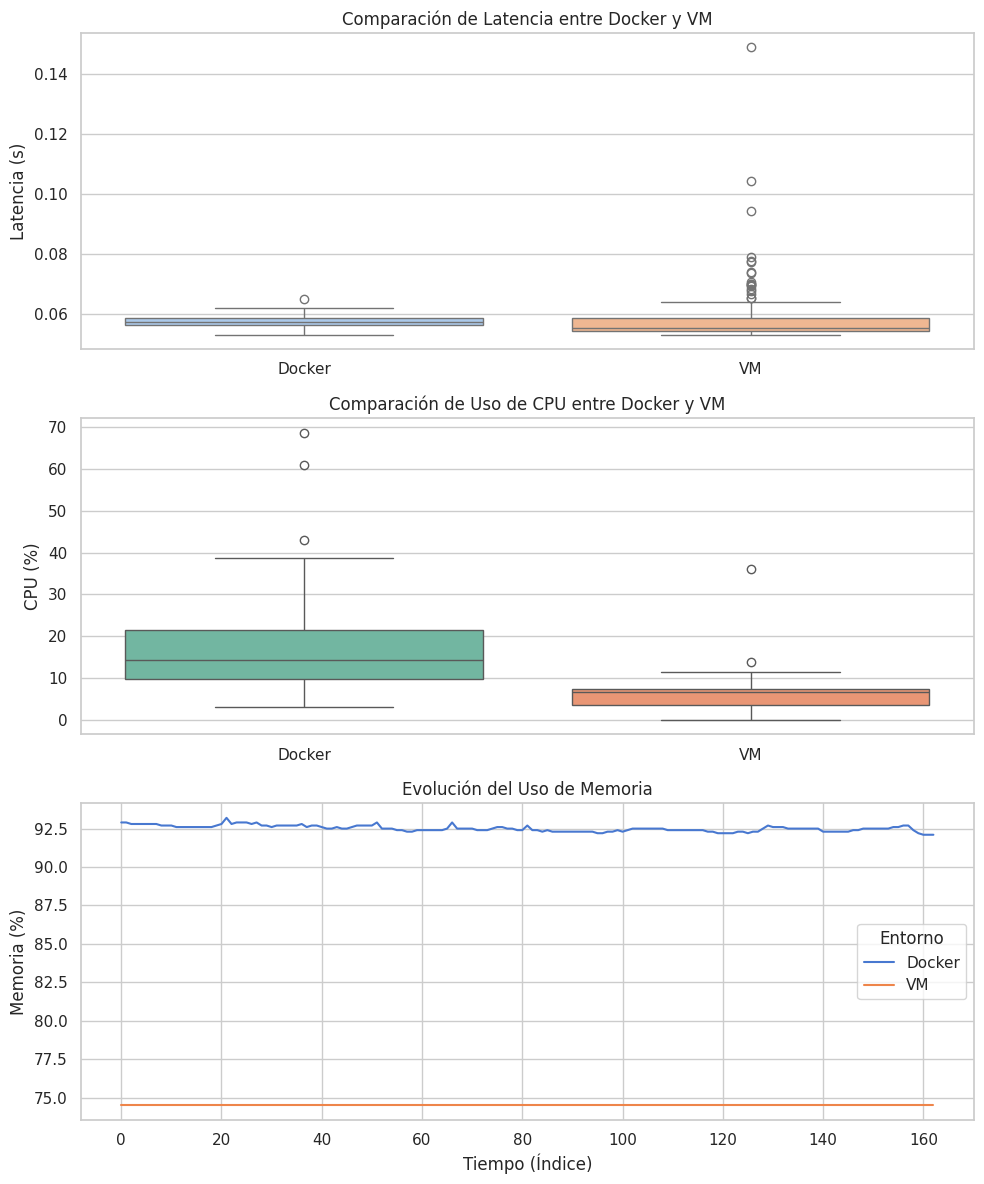

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los CSV
df_docker = pd.read_csv("../results/benchmark_simple_docker.csv")
df_vm = pd.read_csv("../results/benchmark_simple_vm.csv")

# Renombrar columnas
df_docker.rename(columns={"latency": "Latencia", "cpu_percent": "CPU (%)", "memory_percent": "Memoria (%)"}, inplace=True)
df_vm.rename(columns={"latency": "Latencia", "cpu_percent": "CPU (%)", "memory_percent": "Memoria (%)"}, inplace=True)

# Añadir columna de entorno
df_docker["Entorno"] = "Docker"
df_vm["Entorno"] = "VM"

# Añadir un índice temporal si no existe
df_docker["Índice"] = range(len(df_docker))
df_vm["Índice"] = range(len(df_vm))

# Combinar los dataframes
df = pd.concat([df_docker, df_vm], ignore_index=True)

# Crear los tres gráficos
plt.figure(figsize=(10, 12))

# Gráfico 1: Latencia
plt.subplot(3, 1, 1)
sns.boxplot(data=df, x="Entorno", y="Latencia", palette="pastel")
plt.title("Comparación de Latencia entre Docker y VM")
plt.ylabel("Latencia (s)")
plt.xlabel("")

# Gráfico 2: CPU
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x="Entorno", y="CPU (%)", palette="Set2")
plt.title("Comparación de Uso de CPU entre Docker y VM")
plt.ylabel("CPU (%)")
plt.xlabel("")

# Gráfico 3: Memoria como gráfico de líneas
plt.subplot(3, 1, 3)
sns.lineplot(data=df, x="Índice", y="Memoria (%)", hue="Entorno", palette="muted")
plt.title("Evolución del Uso de Memoria")
plt.ylabel("Memoria (%)")
plt.xlabel("Tiempo (Índice)")

plt.tight_layout()
plt.show()
